<a href="https://colab.research.google.com/github/coder-omer/assignments/blob/main/d1313_DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
import tensorflow as tf

In [5]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [7]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [9]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [10]:
# Checking the shape of one image
X_train[1].shape

(28, 28)

In [11]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

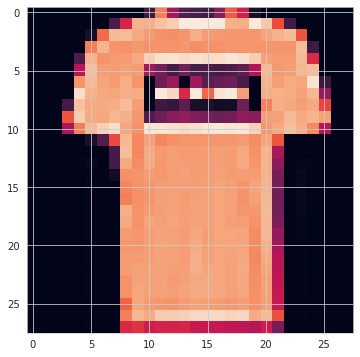

In [12]:
plt.imshow(X_train[1])

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
y_train[0]

9

In [15]:
classes[9 ]

'Ankle boot'

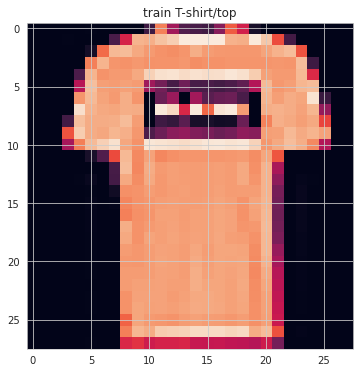

In [16]:
plt.imshow(X_train[1])
plt.title("train "+classes[y_train[1]]);

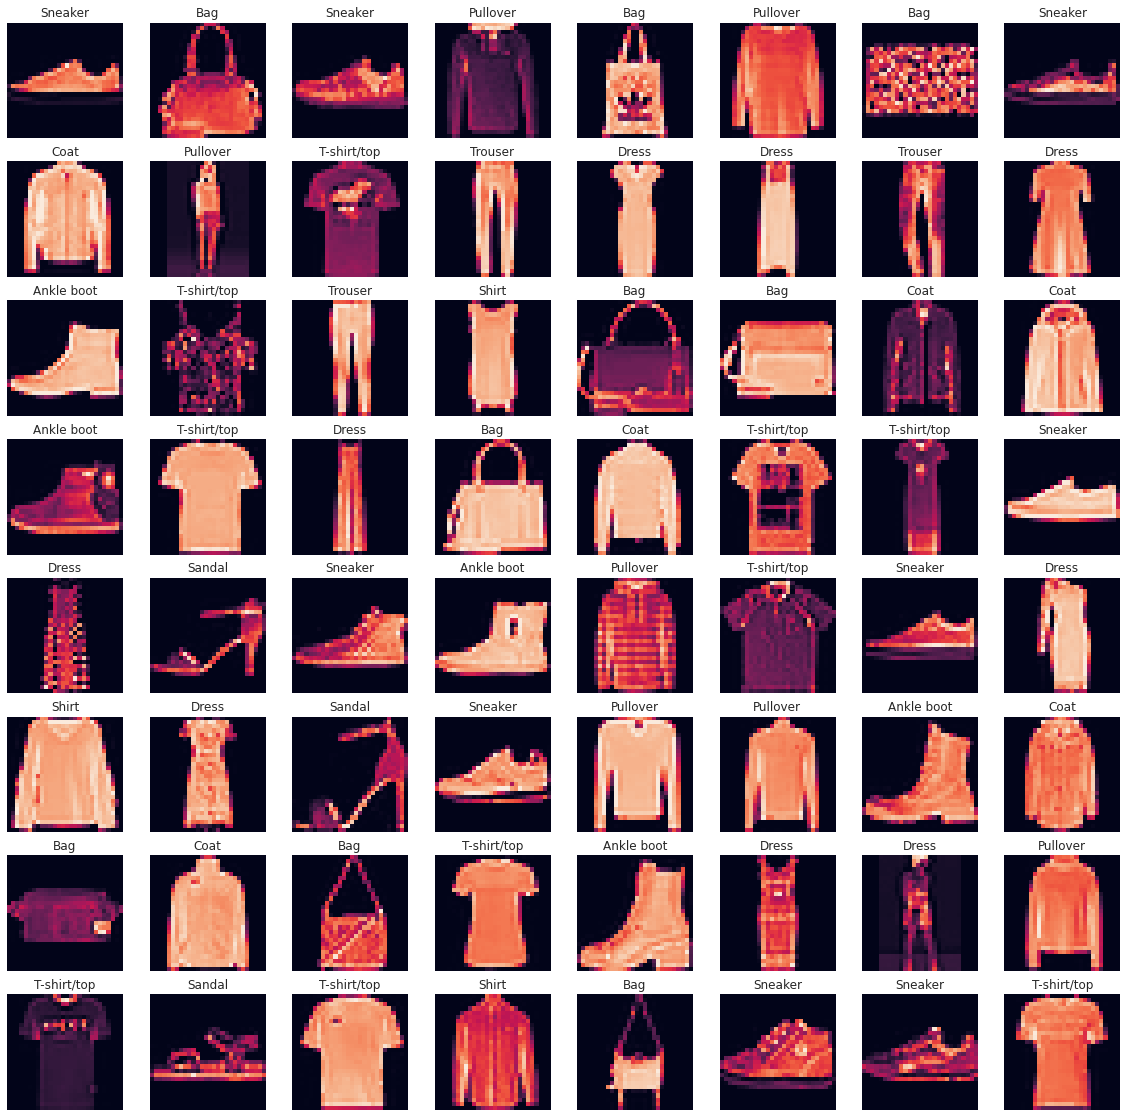

In [17]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [18]:
X_train.min()

0

In [19]:
X_train.max()

255

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [21]:
X_train /= 255
X_test /= 255

In [22]:
X_train.min()

0.0

In [23]:
X_train.max()

1.0

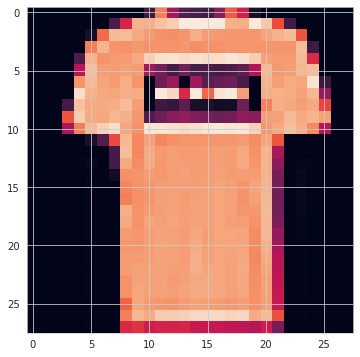

In [24]:
plt.imshow(X_train[1])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
display(X_train.shape, X_test.shape)

(60000, 28, 28)

(10000, 28, 28)

In [27]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [28]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [31]:
y_train.shape

(60000,)

In [32]:
y_train_cat = to_categorical(y_train,10) 
y_test_cat = to_categorical(y_test,10)

In [33]:
y_train_cat.shape, y_test_cat.shape

((60000, 10), (10000, 10))

In [34]:
y_train[5]

2

In [35]:
y_train_cat[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [51]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 17500)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2240128   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [55]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [56]:
model.fit(X_train, y_train_cat, batch_size=32, epochs=50, validation_data=(X_test,y_test_cat),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4728 - accuracy: 0.8396 - val_loss: 0.3381 - val_accuracy: 0.8824
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3340 - accuracy: 0.8860 - val_loss: 0.3272 - val_accuracy: 0.8914
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3163 - accuracy: 0.8919 - val_loss: 0.3256 - val_accuracy: 0.8898
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3100 - accuracy: 0.8947 - val_loss: 0.3073 - val_accuracy: 0.8979
Epoch 5/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3035 - accuracy: 0.8977 - val_loss: 0.3099 - val_accuracy: 0.8973
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3024 - accuracy: 0.8987 - val_loss: 0.3028 - val_accuracy: 0.8950
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3003 - accuracy: 0.8987 - val_loss: 0.3137 - val_accuracy

**TASK 7: Plot values of metrics you used in your model.**

In [57]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.473,0.840,0.338,0.882
1,0.334,0.886,0.327,0.891
2,0.316,0.892,0.326,0.890
3,0.310,0.895,0.307,0.898
4,0.304,0.898,0.310,0.897


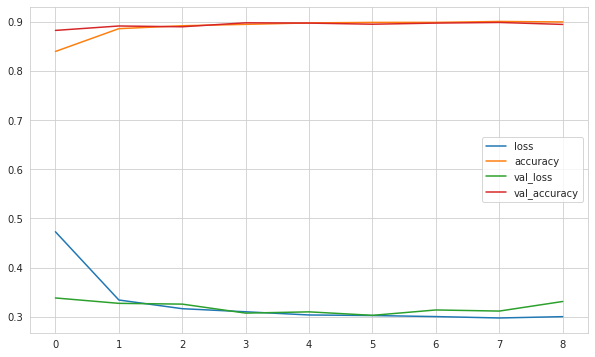

In [58]:
summary.plot();

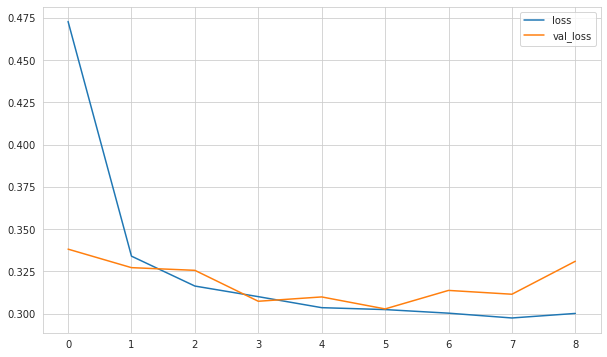

In [59]:
summary[["loss", "val_loss"]].plot();

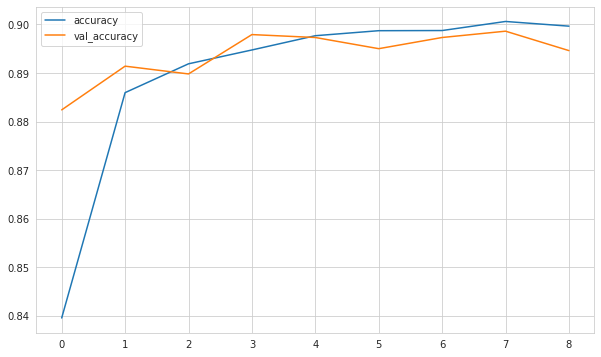

In [60]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
score = model.evaluate(X_test, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3027782738208771
Test accuracy: 0.8949999809265137


In [63]:
pred_prob = model.predict(X_test)
pred_prob

array([[9.4834629e-09, 1.9586391e-10, 7.7911849e-10, ..., 2.2775980e-04,
        3.7175940e-07, 9.9964190e-01],
       [6.4834830e-07, 1.7815424e-12, 9.9992335e-01, ..., 1.6480967e-13,
        2.2280330e-10, 3.0206707e-13],
       [6.0653912e-11, 1.0000000e+00, 1.1147139e-13, ..., 1.1393691e-14,
        3.4466610e-11, 6.7187880e-14],
       ...,
       [3.0583183e-06, 5.5154012e-20, 5.0706372e-09, ..., 2.8106012e-15,
        9.9999690e-01, 1.4211893e-16],
       [5.8298548e-09, 9.9999619e-01, 5.6579245e-11, ..., 9.5259800e-11,
        2.8603626e-09, 1.3248894e-10],
       [1.5322049e-03, 2.9001755e-04, 2.7075359e-03, ..., 6.5742952e-01,
        2.7831674e-02, 1.9373847e-02]], dtype=float32)

In [64]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 7])

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.81      0.86      0.83      1000
           3       0.89      0.89      0.89      1000
           4       0.81      0.85      0.83      1000
           5       0.99      0.95      0.97      1000
           6       0.79      0.59      0.68      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.90      0.89     10000



In [66]:
print(confusion_matrix(y_test, y_pred))

[[905   2  18  16   6   2  45   0   5   1]
 [  2 974   2  14   5   0   1   0   2   0]
 [ 18   0 856  10  62   0  51   0   3   0]
 [ 21   9  19 894  35   0  18   0   4   0]
 [  0   1  75  34 852   0  37   0   1   0]
 [  0   0   0   2   0 954   0  24   0  20]
 [179   3  88  29  94   0 594   0  13   0]
 [  0   0   0   0   0   5   0 968   1  26]
 [  2   2   2   4   2   3   3   3 979   0]
 [  0   0   0   0   0   4   0  22   0 974]]


In [67]:
(y_test != y_pred).sum()     #toplam kaç tane hata var

1050

## Prediction

In [69]:
images=[X_test[11], X_test[25], X_test[34] ]   #örnek değerler alıp tahmin ettirelim

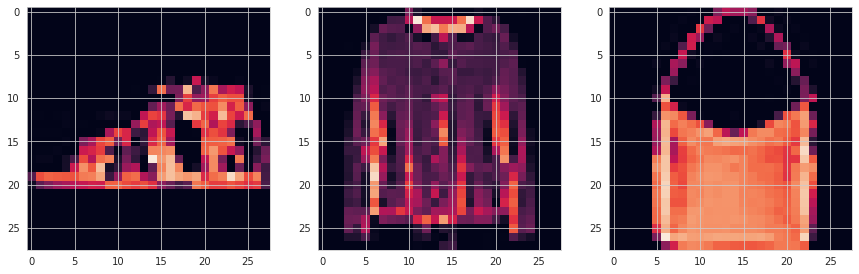

In [70]:
plt.figure(figsize = (20,5))
index=1
for i in images:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [72]:
images = np.array(images)

In [73]:
images.shape

(3, 28, 28, 1)

In [74]:
pred_prob = model.predict(images)
pred_prob

array([[2.03815688e-07, 3.26016263e-11, 1.52723469e-08, 2.41548559e-10,
        3.85775689e-10, 9.99848366e-01, 9.54159987e-07, 2.12918549e-05,
        4.36331948e-06, 1.24775019e-04],
       [2.17140466e-03, 1.47223254e-04, 3.15028012e-01, 4.88394347e-04,
        1.23844355e-01, 1.40965887e-04, 5.57830691e-01, 5.41676911e-07,
        3.41116684e-04, 7.31881300e-06],
       [9.13806332e-07, 2.45601215e-18, 3.66780455e-07, 1.37260203e-10,
        1.48439012e-08, 2.54917768e-06, 2.41035458e-08, 2.60941407e-11,
        9.99996185e-01, 2.91611028e-13]], dtype=float32)

In [75]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([5, 6, 8])

In [77]:
y_test[11]

5

In [78]:
y_test[25]

4

In [80]:
y_test[34]

8

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___